<div style="max-width:1200px"><img src="assets/mgnify_banner.png" width="100%"></div>

<img src="assets/mgnify_logo.png" width="200px">

# Genome-resolved metagenomics bioinformatics 2022

## Programmatic access to MGnify resources with APIs and notebooks (practical session)

The [MGnify API](https://www.ebi.ac.uk/metagenomics/api/v1/) (Application Programming Interface) is a service to get data from MGnify using command line tools, scripts, code notebooks, etc.
It can be access from pretty much any coding language... but Python and R are the most popular choices.

### Today we will use Python
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM-flattened.png" width="120px">

You don't need to know Python to do this — all of the answers are given.

### Tomorrow we will use R
<img src="https://www.r-project.org/logo/Rlogo.png" width="60px">

You won't need to know R either – and there is a helper library called [MGnifyR](http://github.com/beadyallen/mgnifyr) that you'll learn to use tomorrow.

**This is an interactive code notebook (a Jupyter Notebook). To run this code, click into each cell and press the ▶ button in the top toolbar, or press `shift + enter`**

---
# Core concepts
An [API](https://en.wikipedia.org/wiki/API "Application programming interface") is how your scripts (e.g. Python or R) can talk to the MGnify database.

The MGnify API uses [JSON](https://en.wikipedia.org/wiki/JSON "Javascript Object Notation") to transfer data in a systematic way. This is human-readable and computer-readable.

The particular format we use is a standard called [JSON:API](https://jsonapi.org). 
There is a Python package ([`jsonapi_client`](https://pypi.org/project/jsonapi-client/)) to make consuming this data easy. We're using it here.

The MGnify API has a "browsable interface", which is a human-friendly way of exploring the API. The URLs for the browsable API are exactly the same as you'd use in a script or code; but when you open those URLs in a browser you see a nice interface. Find it here: [https://www.ebi.ac.uk/metagenomics/api/v1/](https://www.ebi.ac.uk/metagenomics/api/v1/).

The MGnify API is "paginated", i.e. when you list some data you are given it in multiple pages. This is because there can sometimes by thousands of results. Thankfully `jsonapi_client` handles this for us.

---
# Import packages

[pandas](https://pandas.pydata.org/docs/reference/index.html#api) is a data analysis library with a huge list of features. It is very good at holding and manipulating table data.

In [4]:
import pandas as pd

[jsonapi-client](https://pypi.org/project/jsonapi-client/) is a library to get formatted data from web services into python code

In [5]:
from jsonapi_client import Session as APISession
from jsonapi_client import Modifier

--- 
# API Discovery

First, we will learn how to discover and use the API Endpoints (URLs) from the MGnify website.

## When the API endpoint is directly mentioned

<div class="alert alert-block alert-warning">
A task for you
</div>

- Go to [Study MGYS00002008](https://www.ebi.ac.uk/metagenomics/studies/MGYS00002008) on the MGnify website
- Scroll down to the "Programmatic access" box
- Find the "API endpoint" value
- Click that API endpoint link, you'll see structured data – this is a JSON object
- Back on the Study page, copy that API endpoint value
- **See if you can complete the following code cell, which will read in that JSON data into Python...**

In [ ]:
import requests

api_endpoint = 'https://_______________________________________'

api_response = requests.get(api_endpoint)
api_response.json()

In [ ]:
import requests

api_endpoint = 'https://_______________________________________'

api_response = requests.get(api_endpoint)
api_response.json()

<div class="alert alert-block alert-info">
Unhide the cell below (click the •••) to see or use the answer.
</div>

In [6]:
import requests

api_endpoint = 'https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008'

api_response = requests.get(api_endpoint)
api_response.json()

{'data': {'type': 'studies',
  'id': 'MGYS00002008',
  'attributes': {'bioproject': 'PRJEB22493',
   'samples-count': 136,
   'accession': 'MGYS00002008',
   'is-private': False,
   'secondary-accession': 'ERP104174',
   'centre-name': 'EMBL-EBI',
   'public-release-date': None,
   'study-abstract': 'The APY Third Party Annotation (TPA) assembly was derived from the primary whole genome shotgun (WGS) data set PRJEB1787. This project includes samples from the following biomes : Marine.',
   'study-name': 'EMG produced TPA metagenomics assembly of the Shotgun Sequencing of Tara Oceans DNA samples corresponding to size fractions for  prokaryotes. (APY) data set',
   'data-origination': 'SUBMITTED',
   'last-update': '2022-01-16T11:17:46'},
  'relationships': {'studies': {'links': {'related': 'https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/studies'},
    'data': [{'type': 'studies',
      'id': 'MGYS00000410',
      'links': {'self': 'https://www.ebi.ac.uk/metagenomics/api/

Notice that this is now a Python dictionary of `data`, with some generic sounding top-level keys like `attributes` and `relationships`

In [ ]:
api_response.json()['data'].keys()

These are part of the JSON:API specification that makes the API even easier to use with code libraries... More on that in a moment!

## From the Browsable API root
Usually, you'll need to find a starting point for your API request endpoint.

<div class="alert alert-block alert-warning">
A task for you
</div>

- Browse to https://www.ebi.ac.uk/metagenomics/api/v1
- Notice that there are lots of API routes listed here, for all kind of MGnify datasets
- Click on the `"studies"` endpoint
- How would you find the MGYS00002008 endpoint from here?
    - Click the "Filters" button near the top.
    - Type `MGYS00002008` into the first filter (for an accession)
    - Click Submit
- Notice you're now on an API view which **lists** studies matching your query. There is only one, exactly matching your query, but it is still a list.
- Find (by eye) the URL keyed by `data[0].links.self`.
- Is this the same URL as the API Endpoint you copied from the website study page? (__It should be!__)

## When you're after more than one database entry

More realistically, you will run API queries that return many results.

<div class="alert alert-block alert-warning">
A task for you
</div>

- Browse back to the [API Studies list endpoint](https://www.ebi.ac.uk/metagenomics/api/v1/studies)
- Use the Filter button to limit the query to Studies from the `root:Host-associated:Insecta` biome lineage 
- The returned dataset is long... **but is it all of the matching Studies?**
    - Check the `links` section of data... or the `meta.pagination` section of data (probably right at the bottom).
    
- To get **all** of the matching data, we need to make multiple requests - one for each page of data

### Fetching paginated datasets
This quickly gets complicated, but the `jsonapi_client` library can make it easy! It `iterate`s over the pages for us...

**Try and complete this code cell to read all `root:Host-associated:Insecta` studies into a Pandas dataframe (like a table)**

In [ ]:
endpoint_name = "studies"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    biome_filter = Modifier("lineage=root:______________________________")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=biome_filter))
    resources = pd.json_normalize(resources)
resources

If you know Pandas well... how would you write that table of studies into a CSV file?

In [ ]:
# hint: there is a Pandas dataframe method to do exactly this!




<div class="alert alert-block alert-info">
Unhide the cell below (click the •••) to see or use the answer.
</div>

In [7]:
endpoint_name = "studies"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    biome_filter = Modifier("lineage=root:Host-associated:Insecta")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=biome_filter))
    resources = pd.json_normalize(resources)
resources.to_csv(f"insecta_studies.csv")
resources

,type,id,attributes.bioproject,attributes.accession,attributes.samples-count,attributes.is-private,attributes.secondary-accession,attributes.centre-name,attributes.study-abstract,attributes.study-name,attributes.data-origination,attributes.last-update,relationships.biomes.data
0,studies,MGYS00006026,PRJEB53590,MGYS00006026,14,False,ERP138399,EMG,The Third Party Annotation (TPA) assembly was ...,EMG produced TPA metagenomics assembly of PRJN...,SUBMITTED,2022-06-29T18:39:12,[{'id': 'root:Host-associated:Insecta:Digestiv...
1,studies,MGYS00006019,PRJNA422176,MGYS00006019,20,False,SRP126632,KAUST,The gut bacterial microbiome of honeybee (Apis...,Honeybee bacterial community across gut compar...,HARVESTED,2022-05-26T10:45:22,[{'id': 'root:Host-associated:Insecta:Digestiv...
2,studies,MGYS00006022,PRJNA422177,MGYS00006022,20,False,SRP126630,KAUST,The gut fungal microbiome of honeybee (Apis me...,Honeybee fungal community across gut compartments,HARVESTED,2022-05-26T10:36:25,[{'id': 'root:Host-associated:Insecta:Digestiv...
3,studies,MGYS00005862,PRJNA660574,MGYS00005862,21,False,SRP279534,IRTA-CReSA,The microbiome profile of a local population o...,Microbiota of field-caught Anopheles atroparvus,HARVESTED,2022-01-06T15:23:37,"[{'id': 'root:Host-associated:Insecta', 'type'..."
4,studies,MGYS00005463,PRJEB31429,MGYS00005463,4,False,ERP113989,EMG,The Third Party Annotation (TPA) assembly was ...,EMG produced TPA metagenomics assembly of the ...,SUBMITTED,2020-05-22T08:53:19,"[{'id': 'root:Host-associated:Insecta', 'type'..."
5,studies,MGYS00005464,PRJNA407112,MGYS00005464,3,False,SRP117625,Columbia,"The ecology of bee viruses is complex, as viru...",Investigating the viral ecology of global bee ...,HARVESTED,2020-05-22T03:34:31,"[{'id': 'root:Host-associated:Insecta', 'type'..."
6,studies,MGYS00005215,PRJNA309422,MGYS00005215,424,False,SRP071118,University of Texas,16S rRNA amplicons from corbiculate bee gut co...,Corbiculate bee gut amplicons Raw sequence reads,HARVESTED,2020-05-02T01:47:47,[{'id': 'root:Host-associated:Insecta:Digestiv...
7,studies,MGYS00005163,PRJEB13694,MGYS00005163,429,False,ERP015256,MAX PLANCK INSTITUTE FOR DEVELOPMENTAL BIOLOGY,Insects and nematodes represent the most speci...,Metagenomic analysis of nematode beetle associ...,SUBMITTED,2020-02-10T10:53:57,"[{'id': 'root:Host-associated:Insecta', 'type'..."
8,studies,MGYS00001047,PRJNA266104,MGYS00001047,6,False,SRP050069,University of Innsbruck,Soil dwelling Dipteran larvae of Dilophus febr...,"Microbiota of Dipteran gut, plant litter and c...",HARVESTED,2019-11-07T16:56:18,[{'id': 'root:Host-associated:Insecta:Digestiv...
9,studies,MGYS00005050,PRJEB27734,MGYS00005050,4,False,ERP109856,Lawrence Berkeley National Laboratory,Metagenomic characterization of the 4 gut regi...,Passalid Beetle2,SUBMITTED,2019-06-28T00:00:00,[{'id': 'root:Host-associated:Insecta:Digestiv...


## Line by line explanation

```python
### The packages were already imported, but if you wanted to use this snippet on it's own as a script you would import them like this:
from jsonapi_client import Session as APISession
import pandas as pd
###


endpoint_name = 'studies'
# An "endpoint" is the specific resource within the API which we want to get data from. 
# It is the a URL relative to the "server base URL" of the API, which for MGnify is https://www.ebi.ac.uk/metagenomics/api/v1.
# You can find the endpoints in the API Docs https://www.ebi.ac.uk/metagenomics/api/docs/ 

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    # Calling "APISession" is enabling a connection to the MGnify API, that can be used multiple times. 
    # The `with...as mgnify` syntax is a Python "context". 
    # Everything inside the `with...` block (i.e. indented below it) can use the `APISession` which we've called `mgnify` here. 
    # When the `with` block closes (the indentation stops), the connection to the API is nicely cleaned up for us.
    
    # Using a Modifier, we can filter the results from the API. 
    # The biome_filter will add the "lineage=XXX" to the query sent to the API
    # This will be used by the API to filter the studies in the response by the biome specified in "lineage"
    biome_filter = Modifier("lineage=root:Host-associated:Insecta")

    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=biome_filter))
    # `map` applies a function to every element of an iterable - so do something to each thing in a list.
    # Remember we said the API is paginated? 
    # `mgnify.iterate(endpoint_name)` is a very helpful function that loops over as many pages of results as there are.
    # `lambda r: r.json` is grabbing the JSON attribute from each Super Study returned from the API.
    # All together, this makes `resources` be a bunch of JSON representations we could loop through, each containing the data of a Super Study.
    
    resources = pd.json_normalize(resources)
    # `pd` is the de-facto shorthand for the `pandas` package - you'll see it anywhere people are using pandas.
    # The `json_normalize` function takes "nested" data and does its best to turn it into a table.
    # You can throw quite strange-looking data at it and it usually does something sensible.
    
    resources.to_csv(f"{endpoint_name}.csv")
    # Pandas has a built-in way of writing CSV (or TSV, etc) files, which is helpful for getting data into other tools.
    # This writes the table-ified Super Study list to a file called `super-studies.csv`.
    
resources
# In a Jupyter notebook, you can just write a variable name in a cell (or the last line of a long cell), and it will print it.
# Jupyter knows how to display Pandas tables (actually called "DataFrames", because they are More Than Just Tables ™) in a pretty way.
```


--- 
# MAGs resources - programmatically

## Listing genomic resources from the MGnify API

**The goals of this task are to make a genus-specific version of [Extended Data Figure 4a from Almeida et al 2020](https://www.nature.com/articles/s41587-020-0603-3/figures/10), as well as to see which biomes that genus is present in**

<div class="alert alert-block alert-warning">
A task for you
</div>

- Write some Python code that fetches all MGnify genomes from the `Streptococcus` genus into a Pandas Dataframe.
- Make a "Box and whiskers" plot of the Completeness and Contamination distributions for the genomes in that genus.
- Make a histogram plot showing how many times this genus appears in each biome-specifc catalogue

Hints:
- The lineage for the Streptococcus genus is `d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus`
- The [API endpoint name for genomes is `genomes`](https://www.ebi.ac.uk/metagenomics/api/v1/genomes)
- The API filter key on that endpoint, for taxonomic lineage, is `taxon_lineage=`
- The completeness and contamination % values for each genome are in `attributes['completeness']` and `attributes['contamination']` respectively. Pandas normalizes these to columns named `'attributes.completeness'` and `'attributes.contamination'`
- There is a [Pandas method `.boxplot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) to make a boxplot from a dataframe column/series
- The catalogue ID a genome belongs to is in `relationships['catalogue']['data']['id']`, which Pandas normalizes to a column named `relationships.catalogue.data.id`
- A column (series) of data from a Pandas dataframe can be selected like `resources['my.column.name']` and the [Pandas `.hist()` method] by default shows a histogram of data counts grouped by unique values

In [ ]:
endpoint_name = "_______"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    lineage_filter = _________________________
    resources = _________________
    resources = pd.json_normalize(resources)
resources

In [ ]:
_________.boxplot(_________________________)

In [ ]:
resources['____________________________').hist()

<div class="alert alert-block alert-info">
Unhide the cells below (click the •••) to see or use the answer.
</div>

In [8]:
endpoint_name = "genomes"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    lineage_filter = Modifier("taxon_lineage=d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus")
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name, filter=lineage_filter))
    resources = pd.json_normalize(resources)
resources

,type,id,attributes.genome-id,attributes.geographic-range,attributes.geographic-origin,attributes.accession,attributes.ena-sample-accession,attributes.ena-study-accession,attributes.length,attributes.num-contigs,...,attributes.pangenome-accessory-size,attributes.last-update,attributes.first-created,relationships.catalogue.data.id,relationships.catalogue.data.type,relationships.biome.data.id,relationships.biome.data.type,attributes.ncbi-genome-accession,attributes.ncbi-sample-accession,attributes.ncbi-study-accession
0,genomes,MGYG000301840,14521,[Asia],Asia,MGYG000301840,ERS12510205,ERP138410,2399126,16,...,1072.0,2022-11-29T11:09:03.681599,2022-11-29T11:09:03.678953,pig-gut-v1-0,genome-catalogues,root:Host-associated:Mammals:Gastrointestinal ...,biomes,NaN,NaN,NaN
1,genomes,MGYG000301652,15565,[Asia],Asia,MGYG000301652,ERS12501501,ERP137783,1861661,46,...,206.0,2022-11-29T11:38:29.625963,2022-11-29T11:38:29.623194,pig-gut-v1-0,genome-catalogues,root:Host-associated:Mammals:Gastrointestinal ...,biomes,NaN,NaN,NaN
2,genomes,MGYG000301379,15032,[Europe],Europe,MGYG000301379,ERS12500223,ERP137406,1772300,209,...,0.0,2022-11-29T11:23:07.346774,2022-11-29T11:23:07.342356,pig-gut-v1-0,genome-catalogues,root:Host-associated:Mammals:Gastrointestinal ...,biomes,NaN,NaN,NaN
3,genomes,MGYG000301371,14811,"[Europe, Asia]",Europe,MGYG000301371,ERS12500425,ERP137406,1211138,255,...,627.0,2022-11-29T11:17:01.363252,2022-11-29T11:17:01.360465,pig-gut-v1-0,genome-catalogues,root:Host-associated:Mammals:Gastrointestinal ...,biomes,NaN,NaN,NaN
4,genomes,MGYG000301270,15546,[],Asia,MGYG000301270,ERS12500731,ERP137371,1887219,28,...,NaN,2022-11-29T11:37:56.513553,2022-11-29T11:37:56.510998,pig-gut-v1-0,genome-catalogues,root:Host-associated:Mammals:Gastrointestinal ...,biomes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,genomes,MGYG000000114,8422,[North America],North America,MGYG000000114,ERS2046560,ERP105624,2012808,8,...,1.0,2021-12-07T19:57:58.564392,2021-12-07T19:57:58.561745,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:La...,biomes,NaN,NaN,NaN
101,genomes,MGYG000000113,5988,"[North America, Europe, Asia, Oceania, South A...",North America,MGYG000000113,ERS2046559,ERP105624,2251845,28,...,7430.0,2021-12-07T18:48:36.632852,2021-12-07T18:48:36.630254,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:La...,biomes,NaN,NaN,NaN
102,genomes,MGYG000000109,6823,[North America],North America,MGYG000000109,ERS2046553,ERP105624,2017268,9,...,338.0,2021-12-07T19:13:51.985363,2021-12-07T19:13:51.982899,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:La...,biomes,NaN,NaN,NaN
103,genomes,MGYG000000088,6812,"[North America, Europe, Asia, Oceania, South A...",Europe,MGYG000000088,ERS2046340,ERP105624,1947463,51,...,2766.0,2021-12-07T19:13:34.221417,2021-12-07T19:13:34.218137,human-gut-v2-0-1,genome-catalogues,root:Host-associated:Human:Digestive system:La...,biomes,NaN,NaN,NaN


<Axes: >

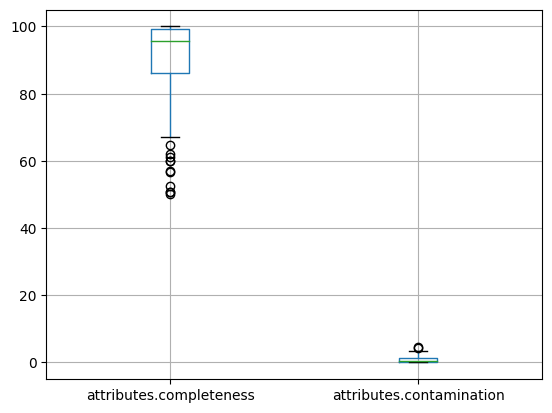

In [9]:
resources.boxplot(column=['attributes.completeness', 'attributes.contamination'])

In [10]:
resources['relationships.catalogue.data.id'].hist()

<Axes: >

## Find out whether your own MAGs are novel compared to the MGnify catalogues

**The goal of this task is to query your own MAGs (created on course day 3) against MGnify's MAG catalogues, to see whether they are novel or already represented**

Your MAGs generated on Day 3 should be in the directory `/home/training/Binning/contigs.fasta.metabat-bins2000.bak`. If something went wrong on Day 3 and you don't have those files any more, there are backup ones you can copy from `/media/penelopeprime/genome-resolved-metagenomics-2022/contigs.fasta.metabat-bins2000.bak`

<div class="alert alert-block alert-warning">
A task for you
</div>

- Query the MGnify API to get a list of the IDs of all Genome Catalougues (using `jsonapi_client` as before)
- Use the `sourmash` package to create a "sketch" of each of your MAGs
- Using the `requests` library (we used this before in <a href="#When-the-API-endpoint-is-directly-mentioned">the first task</a>), send your sketches to the MGnify Genome Search API with a `POST` request
- Check the progress of your search job in a loop that waits for it to finish
- Build a Pandas Dataframe with the search results for all of your MAGs

This task involves lots of new ideas, so a lot of the code is written for you. Rather than writing the code, try and understand what each step is doing!

### Fetch all of the catalogue IDs currently available on MGnify

In [11]:
endpoint_name = "genome-catalogues"

with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
    resources = map(lambda r: r.json, mgnify.iterate(endpoint_name))
    resources = pd.json_normalize(resources)
resources

,type,id,attributes.name,attributes.description,attributes.protein-catalogue-name,attributes.protein-catalogue-description,attributes.genome-count,attributes.unclustered-genome-count,attributes.version,attributes.last-update,attributes.pipeline-version-tag,attributes.ftp-url,relationships.biome.data.id,relationships.biome.data.type
0,genome-catalogues,cow-rumen-v1-0,Cow Rumen v1.0,,Cow rumen protein catalogue v1.0,Protein coding sequences from genomes in the c...,2729,5578,1.0,2021-12-17T15:06:04,v1.2.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Mammals:Digestive system:...,biomes
1,genome-catalogues,human-gut-v2-0-1,Unified Human Gastrointestinal Genome (UHGG) v...,This is an update to the UHGG1.0 catalogue des...,UHGP v2.0.1,Protein coding sequences from genomes in the U...,4744,289232,2.0.1,2022-11-28T15:04:06,v1.2.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Human:Digestive system:La...,biomes
2,genome-catalogues,human-oral-v1-0,Human Oral v1.0,,Human oral protein catalogue v1.0,Protein coding sequences from genomes in the H...,452,1225,1.0,2021-12-17T15:07:15,v1.2.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Human:Digestive system:Oral,biomes
3,genome-catalogues,marine-v1-0,Marine v1.0,,Marine protein catalogue v1.0,Protein coding sequences from genomes in the m...,1496,1504,1.0,2021-12-17T15:06:38,v1.2.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Environmental:Aquatic:Marine,biomes
4,genome-catalogues,non-model-fish-gut-v1-0,Non-model Fish Gut v1.0,,Non-model fish gut protein catalogue v1.0,Protein coding sequences from genomes in the n...,172,196,1.0,2022-11-28T16:00:07,v1.3.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Fish:Digestive system,biomes
5,genome-catalogues,pig-gut-v1-0,Pig Gut v1.0,,Pig gut protein catalogue v1.0,Protein coding sequences from genomes in the p...,1376,3972,1.0,2022-11-29T09:36:43,v1.3.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Mammals:Gastrointestinal ...,biomes
6,genome-catalogues,zebrafish-fecal-v1-0,Zebrafish Fecal v1.0,,Zebrafish fecal protein catalogue v1.0,Protein coding sequences from genomes in the Z...,79,101,1.0,2022-11-28T15:52:24,v1.3.1,http://ftp.ebi.ac.uk/pub/databases/metagenomic...,root:Host-associated:Fish:Digestive system:Int...,biomes


In [12]:
catalogues = list(resources['id'])
catalogues

['cow-rumen-v1-0',
 'human-gut-v2-0-1',
 'human-oral-v1-0',
 'marine-v1-0',
 'non-model-fish-gut-v1-0',
 'pig-gut-v1-0',
 'zebrafish-fecal-v1-0']

### Find all of our own MAGs, and create ["sketches" of them using Sourmash](https://sourmash.readthedocs.io/en/latest/index.html#sourmash-in-brief)
We’ll compute a sourmash sketch for each MAG. A sketch goes into a signature, that we will use for searching. The signature is a sort of collection of hashes that are well suited for calculating the *containment* of your MAGs within the catalogue's MAGs.

In [13]:
import sourmash
from Bio import SeqIO
from pathlib import Path

In [ ]:
my_mags_folder = Path('/home/training/Binning/contigs.fasta.metabat-bins2000.bak')

# pathlib is a handy standard Python library for finding files and directories
my_mags_files = list(my_mags_folder.glob('*.fa*'))
my_mags_files


In [ ]:
for mag_file in my_mags_files:
    # the sourmash parameters are chosen to match those used within MGnify
    sketch = sourmash.MinHash(n=0, ksize=31, scaled=1000)
    
    # a fasta file may have multiple records in it. add them all to the sourmash signature.
    for index, record in enumerate(SeqIO.parse(mag_file, 'fasta')):
        sketch.add_sequence(str(record.seq))

    # save the sourmash sketch as a "signature" file
    sig = sourmash.SourmashSignature(sketch, name=record.name or mag_file.stem)
    with open(mag_file.stem + '.sig', 'wt') as fp:
        sourmash.save_signatures([sig], fp)

# check what signature files we've created.
# using ! in Jupyter lets you run a shell command. It is handy for quick things like pwd and ls.
!ls *.sig

### Submit a search job to the MGnify API
We’ll call the MGnify API with all of our sketches.
There is an endpoint for this (the same one used by the website).

In this case, we need to **send** data to the API (not just fetch it). This is called "POST"ing data in the API world. 

This part of the API is quite specialized and so is not a formal JSON:API, so we use the more flexible [requests](https://docs.python-requests.org/en/master/) Python package to communicate with it, like we did earlier.

In [ ]:
import requests

In [ ]:
endpoint = 'https://www.ebi.ac.uk/metagenomics/api/v1/genomes-search/gather'

# Create a list of file uploads, and attach them to the API request
signatures = [open(mag.stem + '.sig', 'rb') for mag in my_mags_files]
sketch_uploads = [('file_uploaded', signature) for signature in signatures]

# Send the API request - it specifies which catalogue to search against and attaches all of the signature files.
submitted_job = requests.post(endpoint, data={'mag_catalogues': catalogues}, files=sketch_uploads).json()

map(lambda fp: fp.close(), signatures)  # tidy up open file pointers

print(submitted_job)

### Wait for our results to be ready

As you can see in the printed `submitted_job` above, a `status_URL` was returned in the response from submitting the job via the API.
Since the job will be in a queue, we must poll this `status_URL` to wait for our job to be completed.
We’ll check every 2 seconds until ALL of the jobs are finished.

In [ ]:
job_done = False
while not job_done:
    print('Checking status...')
    status = requests.get(submitted_job['data']['status_URL'])
    # the status_URL is just another API endpoint that's unique for our search job
    
    queries_done = {sig['job_id']: sig['status'] for sig in status.json()['data']['signatures']}
    job_done = all(map(lambda q: q == 'SUCCESS', queries_done.values()))
    if not job_done:
        print('Still waiting for jobs to complete. Current status of jobs')
        print(queries_done)
        print('Will check again in 2 seconds')
        time.sleep(2)

print('All finished!')

You can inspect the JSON data we got back by typing `status.json()` into a code cell... But essentially we have a result for each MAG against each catalogue, possibly including a best match MAG (if there was one)

In [ ]:
search_results = pd.json_normalize(status.json()['data']['signatures'])
search_results

### Are any of our MAGs found in biomes other than the human gut?

In [ ]:
matches = search_results.dropna(subset=['result.match'])
matches

In [ ]:
matches.catalogue.hist()

### What is the taxonomy of the MGnify MAGs which match our query MAGs?
To find this, we can call the API for each Genome, to find it's taxonomic lineage... We can put these results into a new column of the table.

In [ ]:
def get_taxonomy_of_mgnify_mag(match_row):
    mgyg_accession = match_row['result.match']
    with APISession("https://www.ebi.ac.uk/metagenomics/api/v1") as mgnify:
        genome_document = mgnify.get('genomes', mgyg_accession)
        return genome_document.resource.taxon_lineage
    
matches['best_match_taxonomy'] = matches.apply(get_taxonomy_of_mgnify_mag, axis=1)

In [ ]:
for _, match in matches.iterrows():
    print(f"My MAG {match['filename']} matches {match['result.match']} which has taxonomy {match['best_match_taxonomy']}")

### Which of our MAGs are completely novel (i.e. in no MGnify catalogue)?

One way to check this is group all of the search results by filename (i.e. finding the queries for each MAG vs all catalogues) and checking whether the sum of all matches is 0...

In [ ]:
search_results.groupby('filename').apply(lambda query: query['result.matches'].sum() == 0)